In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your data with semicolon as the delimiter
df = pd.read_csv('DatasetGold2.csv', sep=';')
print(df)
df.info()

      Tanggal Nama Logam  Harga(Rp)  Unnamed: 3
0    29/12/23    BUYBACK    1028000         NaN
1    29/12/23       GOLD    1130000         NaN
2    28/12/23    BUYBACK    1039000         NaN
3    28/12/23       GOLD    1141000         NaN
4    27/12/23    BUYBACK    1035000         NaN
..        ...        ...        ...         ...
195  23/09/23       GOLD    1079000         NaN
196  22/09/23    BUYBACK     957000         NaN
197  22/09/23       GOLD    1077000         NaN
198  21/09/23    BUYBACK     960000         NaN
199  21/09/23       GOLD    1080000         NaN

[200 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     200 non-null    object 
 1   Nama Logam  200 non-null    object 
 2   Harga(Rp)   200 non-null    int64  
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usa

In [3]:
# Now access the 'Harga' column
y = df['Harga(Rp)'].values

# Split the data into training and testing sets
train, test = train_test_split(y, train_size=160, shuffle=False)

# Print first 5 elements of each set
print(y[:5])
print(train[:5])
print(test[:5])

#train size 160 because 200 - Train size: 80%

[1028000 1130000 1039000 1141000 1035000]
[1028000 1130000 1039000 1141000 1035000]
[ 940000 1062000  931000 1053000  924000]


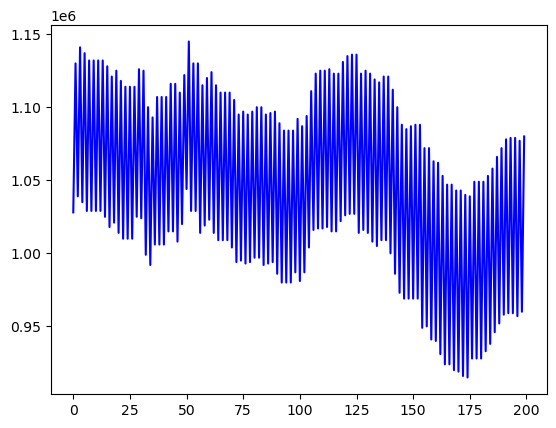

In [5]:
x = np.arange(y.shape[0])
plt.plot(x, y, c='blue')
plt.show()

# SARIMA - To see the past data through season

In [4]:
model = pm.auto_arima(train, seasonal = True, m=30, error_action='ignore')

In [6]:
# Visualize the data
model

ARIMA(order=(0, 1, 5), scoring_args={}, seasonal_order=(1, 0, 0, 30),
      suppress_warnings=True, with_intercept=False)

In [7]:
# Make forecast
forecasts = model.predict(test.shape[0])
forecasts

array([ 990723.83561079, 1052999.73216908,  999462.88138106,
       1042760.51101528, 1009672.04950886, 1033599.02990969,
       1010526.58452318, 1034453.564924  , 1010526.58452318,
       1034453.564924  , 1008603.88074097, 1032530.86114179,
       1005613.00819086, 1029967.25609885, 1002835.76939434,
       1027403.6510559 , 1001981.23438002, 1026762.74979517,
       1001981.23438002, 1027190.01730232, 1001981.23438002,
       1027403.6510559 , 1001981.23438002, 1027403.6510559 ,
        997708.55930845, 1023985.51099864,  997922.19306203,
       1023985.51099864,  995999.48927982, 1022062.80721643,
       1006622.17892369, 1019926.41246292, 1008489.13407429,
       1017738.96921411, 1010670.15698235, 1015781.76761718,
       1010852.71450502, 1015964.32513985, 1010852.71450502,
       1015964.32513985])

In [8]:
test

array([ 940000, 1062000,  931000, 1053000,  924000, 1047000,  924000,
       1047000,  920000, 1043000,  919000, 1043000,  916000, 1040000,
        915000, 1039000,  928000, 1049000,  928000, 1049000,  928000,
       1049000,  933000, 1053000,  938000, 1058000,  946000, 1066000,
        952000, 1072000,  958000, 1078000,  959000, 1079000,  959000,
       1079000,  957000, 1077000,  960000, 1080000], dtype=int64)

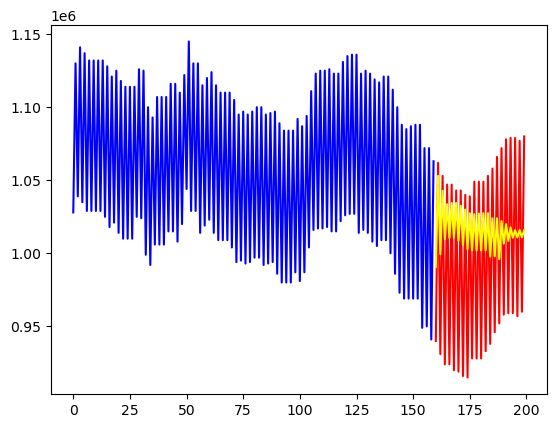

In [9]:
#Visualize

x = np.arange(y.shape[0])
plt.plot(x[:160], train, c='blue')
plt.plot(x[160:], test, c='red')
plt.plot(x[160:], forecasts, c='yellow')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test, forecasts)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 3094916141.5371833


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(test, forecasts)

# Print the mean squared error
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.05047950322334471


## ARIMA - To see past data regardless of the seasons

In [12]:
model = pm.auto_arima(train, seasonal = False, error_action='ignore')

In [13]:
model

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [14]:
# Make forecast
forecasts = model.predict(test.shape[0])
forecasts

array([ 990843.00666436, 1033520.31557616, 1008278.78857016,
       1023207.90902879, 1014378.06931207, 1019600.48476776,
       1016511.6831511 , 1018338.55723035, 1017258.05115854,
       1017897.11730135, 1017519.14114227, 1017742.69543072,
       1017610.47407579, 1017688.67649732, 1017642.42361528,
       1017669.77991775, 1017653.60001172, 1017663.16962952,
       1017657.50967175, 1017660.8572581 , 1017658.87732559,
       1017660.04835819, 1017659.35575007, 1017659.76539367,
       1017659.52310965, 1017659.66640872, 1017659.58165437,
       1017659.6317824 , 1017659.60213414, 1017659.61966962,
       1017659.60929825, 1017659.61543241, 1017659.61180435,
       1017659.61395017, 1017659.61268102, 1017659.61343166,
       1017659.6129877 , 1017659.61325028, 1017659.61309497,
       1017659.61318683])

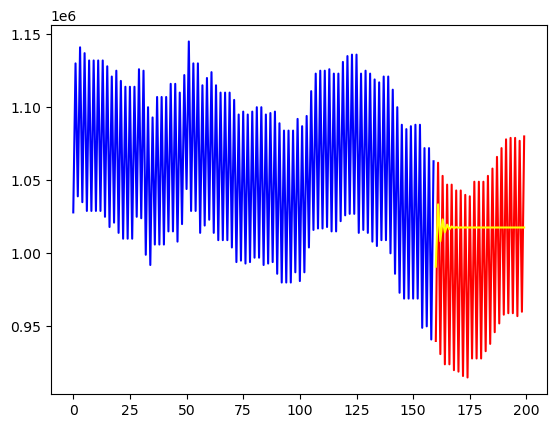

In [15]:
#Visualize

x = np.arange(y.shape[0])
plt.plot(x[:160], train, c='blue')
plt.plot(x[160:], test, c='red')
plt.plot(x[160:], forecasts, c='yellow')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse = mean_squared_error(test, forecasts)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 4125156498.213773


In [17]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate the mean absolute percentage error
mape = mean_absolute_percentage_error(test, forecasts)

# Print the mean squared error
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.06070243902804253


CONCLUSION
=
With the provided MAPE values, the SARIMA model has a lower MAPE (0.05047950322334471) compared to the ARIMA model (0.06070243902804253). Thus, based on the MAPE alone, the SARIMA model is performing better in terms of accuracy.

SARIMA Mean Absolute Percentage Error: 5.05%
ARIMA Mean Absolute Percentage Error: 6.07%